# Modelling 

* In this notebook we will build a machine learning model using the data we processed in the previous session.<br>
* Scikit-learn is a very popular library for Machine Learning in Python. We will explore its API and use it



#### Import packages

In [1]:
#import packages
#for dealing with data
import pandas as pd
import numpy as np
# for changing working directory
import os
#for plotting
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('ggplot')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)

In [2]:
# scikit learn packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, \
                            precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV


# Import the data

In [3]:
! ls data

UCI_Credit_Card.csv processed_data.csv


In [4]:
data=pd.read_csv('data/processed_data.csv',index_col='Unnamed: 0')

In [5]:
data.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,MARRIAGE_MARRIED,MARRIAGE_OTHER,MARRIAGE_SINGLE,MARRIAGE_UNKNOWN,EDUCATION_GRAD_SCHOOL,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHER,EDUCATION_UNIVERSITY,EDUCATION_UNKNOWN,ratio_BILL_AMT1_to_LIMIT,ratio_BILL_AMT2_to_LIMIT,ratio_BILL_AMT3_to_LIMIT,ratio_BILL_AMT4_to_LIMIT,ratio_BILL_AMT5_to_LIMIT,ratio_BILL_AMT6_to_LIMIT
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,0,0,1,0,0,0,0,1,0,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
2,3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,0,0,1,0,0,0,0,1,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767
3,4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,1,0,0,0,0,0,0,1,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,1,0,0,0,0,0,0,1,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620


### Let's check again the columns we have

In [6]:
data.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_FEMALE', 'SEX_MALE', 'MARRIAGE_MARRIED', 'MARRIAGE_OTHER',
       'MARRIAGE_SINGLE', 'MARRIAGE_UNKNOWN', 'EDUCATION_GRAD_SCHOOL',
       'EDUCATION_HIGH_SCHOOL', 'EDUCATION_OTHER', 'EDUCATION_UNIVERSITY',
       'EDUCATION_UNKNOWN', 'ratio_BILL_AMT1_to_LIMIT',
       'ratio_BILL_AMT2_to_LIMIT', 'ratio_BILL_AMT3_to_LIMIT',
       'ratio_BILL_AMT4_to_LIMIT', 'ratio_BILL_AMT5_to_LIMIT',
       'ratio_BILL_AMT6_to_LIMIT'],
      dtype='object')

# Some questions we should ask ourselves before we start modelling
### What is the goal of our model?
* We want to predict the target y (default yes/no) based on a set of features/risk drivers X
* We already did some preprocessing of the data in the previous notebook, however, we not all the variables that we have make sense
* For instance, `ID` cannot have any predictive power, so we should drop it

In [7]:
data.drop('ID',inplace=True,axis=1)

In [8]:
data.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_FEMALE', 'SEX_MALE', 'MARRIAGE_MARRIED', 'MARRIAGE_OTHER',
       'MARRIAGE_SINGLE', 'MARRIAGE_UNKNOWN', 'EDUCATION_GRAD_SCHOOL',
       'EDUCATION_HIGH_SCHOOL', 'EDUCATION_OTHER', 'EDUCATION_UNIVERSITY',
       'EDUCATION_UNKNOWN', 'ratio_BILL_AMT1_to_LIMIT',
       'ratio_BILL_AMT2_to_LIMIT', 'ratio_BILL_AMT3_to_LIMIT',
       'ratio_BILL_AMT4_to_LIMIT', 'ratio_BILL_AMT5_to_LIMIT',
       'ratio_BILL_AMT6_to_LIMIT'],
      dtype='object')

### Do we have enough defaults in our portfolio?
Let's check it

In [9]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

There are 6636 defaults (22%), and 23364 (78%) of no defaults.<br>
The targets are not balances, but this is not a problem

### How much data do we use for training our model, and how much for validating it?
The general rule of thumbs for splitting the data is 70%/30% or 80%/20%.<br>
What matters is that we keep having enough targets in our sample, and that the distributions between our training and test set do not change. <br>
We can use the train_test_split() function from sklearn

In [10]:
data.shape

(30000, 38)

In [11]:
# let' split it in 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['default.payment.next.month','MARRIAGE_OTHER','SEX_MALE','EDUCATION_UNKNOWN'], axis=1),
    data['default.payment.next.month'],test_size=0.25)

# X_train, X_test, y_train, y_test = train_test_split(data[['PAY_1']],
#                                                     data['default.payment.next.month'],test_size=0.25)

In [12]:
X_train.shape, y_train.shape

((22500, 34), (22500,))

In [13]:
X_test.shape, y_test.shape

((7500, 34), (7500,))

In [14]:
# Sanity check 
X_train.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_FEMALE', 'MARRIAGE_MARRIED',
       'MARRIAGE_SINGLE', 'MARRIAGE_UNKNOWN', 'EDUCATION_GRAD_SCHOOL',
       'EDUCATION_HIGH_SCHOOL', 'EDUCATION_OTHER', 'EDUCATION_UNIVERSITY',
       'ratio_BILL_AMT1_to_LIMIT', 'ratio_BILL_AMT2_to_LIMIT',
       'ratio_BILL_AMT3_to_LIMIT', 'ratio_BILL_AMT4_to_LIMIT',
       'ratio_BILL_AMT5_to_LIMIT', 'ratio_BILL_AMT6_to_LIMIT'],
      dtype='object')

### We should check how the targets are distributed in the train and test samples

# Exercise:
Check the target distribution in the two samples

In [15]:
*** your solution here ***

SyntaxError: invalid syntax (<ipython-input-15-2b91ed9bb2e4>, line 1)

As one should expect:
* it follows the train test split (i.e. cca 75% of the bads are in the training set and 25% of the bads are in the test set)
* the distribution within the sample is cca 22% of bads, as in the complete sample

### What about the features?
We do not want that the features are very different in the train and test set, because our validation might be wrong if this is the case.<br>
There are different approaches to estimate the stability of the features distribution, but for the sake of simplicity we are happy with checking if the mean of the distribution is similar or not

In [16]:
for col in X_train.columns:
    print('\ncolumn name:',col)
    print('training mean %.2f'%(X_train[col].mean()),' - test mean %.2f'%(X_test[col].mean()),
          ' - train/test mean: %.2f'%(X_train[col].mean()/X_test[col].mean()))


column name: LIMIT_BAL
training mean 167589.60  - test mean 167168.49  - train/test mean: 1.00

column name: AGE
training mean 35.44  - test mean 35.63  - train/test mean: 0.99

column name: PAY_1
training mean -0.02  - test mean -0.02  - train/test mean: 0.76

column name: PAY_2
training mean -0.13  - test mean -0.15  - train/test mean: 0.88

column name: PAY_3
training mean -0.17  - test mean -0.17  - train/test mean: 1.00

column name: PAY_4
training mean -0.22  - test mean -0.22  - train/test mean: 1.03

column name: PAY_5
training mean -0.27  - test mean -0.26  - train/test mean: 1.01

column name: PAY_6
training mean -0.30  - test mean -0.28  - train/test mean: 1.06

column name: BILL_AMT1
training mean 51077.68  - test mean 51660.28  - train/test mean: 0.99

column name: BILL_AMT2
training mean 49027.26  - test mean 49634.53  - train/test mean: 0.99

column name: BILL_AMT3
training mean 46802.36  - test mean 47645.55  - train/test mean: 0.98

column name: BILL_AMT4
training mea

# The first model
Let's start simple and classical, and begin with a Logistic Regression

In [17]:
# Defining the model
lr = LogisticRegression()

### Training the model
In the scikit learn API, training and algorithm is done bu the `fit()` function.
One can use the `predict()` or `predict_proba()` to predict the outcome or predict the probability for the outcome

In [18]:
%%time
lr.fit(X_train,y_train)

/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 637 ms, sys: 12.7 ms, total: 649 ms
Wall time: 650 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Training a logisitc regression is very fast, it took less than a second

### Predicting the outcome

In [19]:
# it returns an array of 0 and 1
predictions = lr.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
predicted_probs=lr.predict_proba(X_test)
predicted_probs

array([[0.90027568, 0.09972432],
       [0.9104679 , 0.0895321 ],
       [0.76282882, 0.23717118],
       ...,
       [0.82549364, 0.17450636],
       [0.86150403, 0.13849597],
       [0.84924486, 0.15075514]])

In [21]:
predicted_probs.shape

(7500, 2)

As you can see, predicted_proba returns a matrix of 7500 rows and two columns. Let's read the API documentation to understand why

In [22]:
help(lr.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



It says that it returns the probability of the classes.<br>
It means that the first array will show the probability of class 0 (no defaults) and the second array shows the probability of class 1 (defaults).<br>
We are interested in the probability of defaults, hence the probability of being 1.

In [23]:
predicted_probs[:,1] 

array([0.09972432, 0.0895321 , 0.23717118, ..., 0.17450636, 0.13849597,
       0.15075514])

### How well does my model perform?
We need some metric to evaluate the model.<br>
`sklearn.metrics` offers a lot of them.<br>
Let's see some examples

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score

In [25]:
print('Accuracy: %.3f'%accuracy_score(y_test,predictions))

Accuracy: 0.778


In [26]:
from plotting import plot_confusion_matrix

Normalized confusion matrix


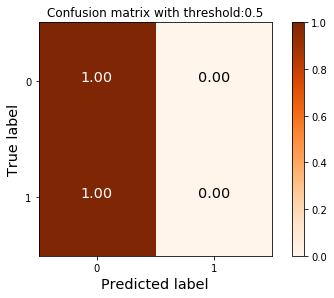

In [27]:
plot_confusion_matrix(lr,X_train,y_train,threshold=0.5,cmap=plt.cm.Oranges, normalize=True)

### What's wrong here?
* The model has a decent precision (78%) but the confusion matrix looks a bit weird, right? What is going on here?


# Lesson learned: some metrics might be misleading - we need to check more than just the accuracy!

In [28]:
print('Precision:',precision_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))
print('AUC score: %.3f'%(roc_auc_score(y_test,predicted_probs[:,1])))

Precision: 0.0
Recall: 0.0
AUC score: 0.641


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5837
           1       0.00      0.00      0.00      1663

   micro avg       0.78      0.78      0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



#### And if I change my model threshold?

Accuracy: 0.319
Precision: 0.23926194797338174
Recall: 0.9512928442573662
AUC score: 0.641
Normalized confusion matrix


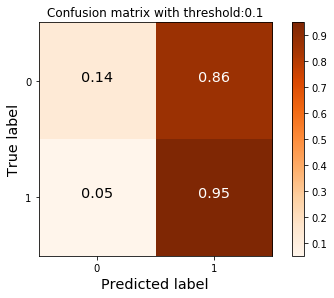

In [30]:
threshold = 0.1
predictions_015 = np.array(list(map(lambda x: 1 if x else 0, lr.predict_proba(X_test)[:,1]>threshold)))
print('Accuracy: %.3f'%accuracy_score(y_test,predictions_015))
print('Precision:',precision_score(y_test,predictions_015))
print('Recall:',recall_score(y_test,predictions_015))
print('AUC score: %.3f'%(roc_auc_score(y_test,predicted_probs[:,1])))

plot_confusion_matrix(lr,X_train,y_train,threshold=threshold,cmap=plt.cm.Oranges, normalize=True)

### AUC is threshold indipendent!

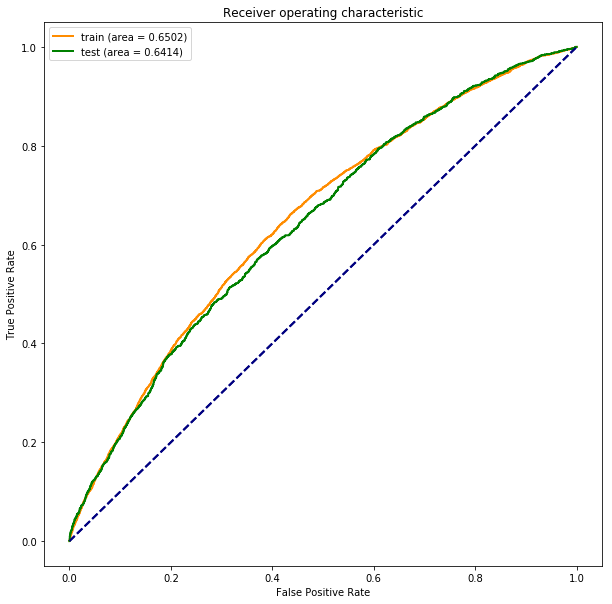

In [31]:
from plotting import plot_precision_recall_curve,plot_roc_curve
fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(lr,X_train,y_train, ax, label='train')
plot_roc_curve(lr,X_test,y_test, ax, label='test',color = 'green')

# Let's try a non-linear model

## Random Forest

# Exercise: 
create and train a Random forest classifier. <br>
tip: check how we created and trained a Logistic Regression

In [ ]:
*** your solution here ***

## Evaluate the classifier

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(rf_default,X_train,y_train, ax, label='train')
plot_roc_curve(rf_default,X_test,y_test, ax, label='test',color = 'green')

### Another curve we would like to see is the precision vs recall

In [ ]:
from plotting import plot_precision_recall_curve
fig, ax = plt.subplots(figsize=(10, 10))
plot_precision_recall_curve(rf_default,X_train,y_train, ax, label='train')
plot_precision_recall_curve(rf_default,X_test,y_test, ax, label='test',color = 'green')

# Exercise:
what can you conclude from the ROC AUC curve and the precision vs recall curve?

*** answer ***



### Let' try to evaluate our models in terms of impact on the portfolio

#### Strategy curve

In [ ]:
from plotting import plot_strategy_curve

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_strategy_curve(rf_default,X_train,y_train, ax, label=' RF train',color='darkorange')
plot_strategy_curve(rf_default,X_test,y_test, ax, label='RFtest',linestyle='--', color='darkorange')
plot_strategy_curve(lr,X_train,y_train, ax, label='LR train',color = 'darkblue')
plot_strategy_curve(lr,X_test,y_test, ax, label='LR test',color = 'darkblue',linestyle='--')


#### Profit
As before, let's assume that for every good client we make 1200 euros, and for every bad client we loose 10000

In [ ]:
cost_of_bads = 10000
profit_of_goods = 1200

from plotting import plot_classifier_profit
fig, ax = plt.subplots(figsize=(12, 8))
plot_classifier_profit(rf_default,X_test,y_test, ax, cost_of_bads, profit_of_goods, label='RFtest',linestyle='--', color='darkorange')
plot_classifier_profit(lr,X_test,y_test, ax,cost_of_bads, profit_of_goods, label='LR test',color = 'darkblue',linestyle='--')

ax.set_ylim(-1e6,6e5)
ax.set_xlim(-0,0.4)

# EXERCISE

1. Test different Random Forest hyperparameters.
2. What is the effect of each change of the parametrs to model performance & ofer/under-fitting?

Note: Things you can try:
1. more trees
2. set max_depth
3. set min_samples_leaf

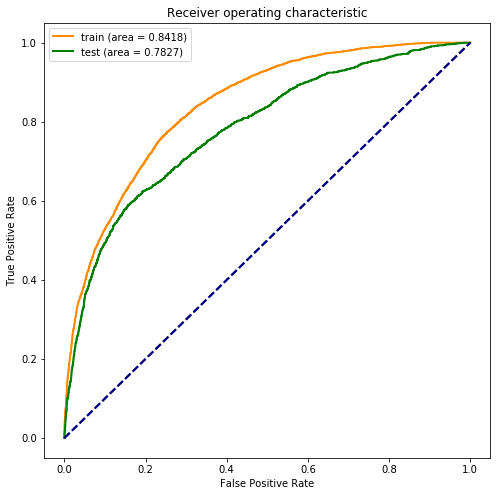

In [32]:
rf = RandomForestClassifier(n_estimators=500, 
#                             criterion='gini',
                            min_samples_leaf=50,
#                             max_depth=6,
                            random_state=24423,
                            n_jobs=-1,
                           )
rf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 8))
plot_roc_curve(rf,X_train,y_train, ax, label='train')
plot_roc_curve(rf,X_test,y_test, ax, label='test',color = 'green')

# How does the model depend on the hyperparameters?


In [33]:
from plotting import plot_score_vs_hyperparameter

In [ ]:
rf_test = RandomForestClassifier(max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.0001, min_samples_split=0.5,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1)
param_grid={'n_estimators': range(1, 111, 10)}

plot_score_vs_hyperparameter(rf_test,X_train,y_train, scoring_metric = 'roc_auc',param_grid=param_grid)

In [ ]:
%%time
rf_test = RandomForestClassifier(n_estimators=70)
param_grid={'max_depth': range(1, 81, 5)}

plot_score_vs_hyperparameter(rf_test,X_train,y_train, scoring_metric = 'roc_auc',param_grid=param_grid)

# Grid Search with cross validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
rf_cv = RandomForestClassifier(max_features=None)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_features += [x for x in range(3,30,1)]
# Maximmax_featuresum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 30)]
max_depth.append(None)
#max_dept=None
min_impurity_decrease = np.linspace(0.0001, 0.3, num = 30)
# Minimum number of samples required to split a node
#min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
#min_samples_split = [x for x in np.linspace(0.0001, 1, num = 30)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in np.linspace(0.0001, 0.5, num = 300)]
# Method of selecting samples for training each t
class_weight = [None, 'balanced']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_impurity_decrease':min_impurity_decrease,
               'bootstrap': bootstrap}

# random_grid = {'n_estimators': n_estimators,
#             'max_depth': max_depth, 'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf}

In [ ]:
%%time
rf_random = RandomizedSearchCV(estimator = rf_cv, scoring='roc_auc',
                               param_distributions = random_grid, n_iter = 400, 
                               cv = 3, verbose=1, random_state=42, n_jobs = -1,
                               return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_estimator_

### Let's see the top 5 scores that the grid search has found

In [ ]:
cv_res = pd.DataFrame(rf_random.cv_results_)
cv_res[['mean_train_score','mean_test_score','params']].sort_values(by='mean_test_score',ascending=False).head()

In [ ]:
best_ests = cv_res.sort_values(by='mean_test_score',ascending=False).head(3).T
best_ests.columns=['1st','2nd','3rd']
best_ests

### Return the best estimator

In [ ]:
rf_best = rf_random.best_estimator_

In [ ]:
rf_best.get_params

In [37]:
 from sklearn.externals import joblib

In [38]:
rf_best_no_overfit= joblib.load('non_overfit_rf.pkl')

/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/we56sc/.miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTree

# How does the best random forest compare to our logistic regression?

In [40]:
from importlib import reload
#reload(plotting)
from plotting import plot_roc_curve

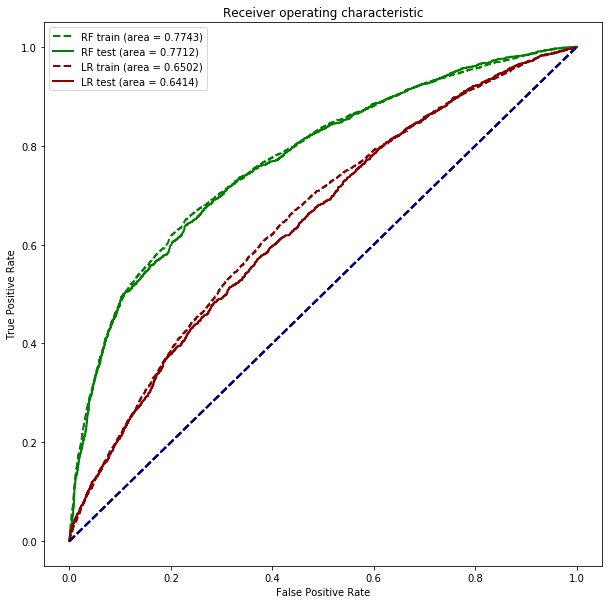

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(rf_best_no_overfit,X_train,y_train, ax, label='RF train',color='green',linestyle='--')
plot_roc_curve(rf_best_no_overfit,X_test,y_test, ax, label='RF test',color = 'green')
plot_roc_curve(lr,X_train,y_train, ax, label='LR train',color='darkred',linestyle='--')
plot_roc_curve(lr,X_test,y_test, ax, label='LR test',color = 'darkred')

(0.0001, 1.01)

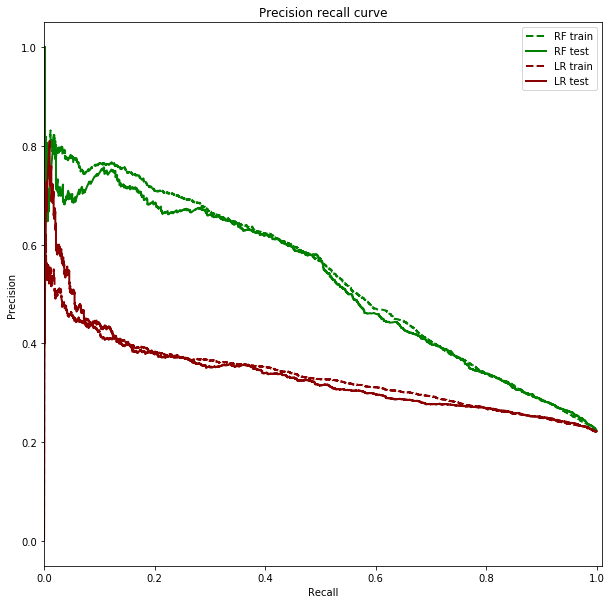

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_precision_recall_curve(rf_best_no_overfit,X_train,y_train, ax, label='RF train',color='green',linestyle='--')
plot_precision_recall_curve(rf_best_no_overfit,X_test,y_test, ax, label='RF test',color = 'green')
plot_precision_recall_curve(lr,X_train,y_train, ax, label='LR train',color='darkred',linestyle='--')
plot_precision_recall_curve(lr,X_test,y_test, ax, label='LR test',color = 'darkred')
ax.set_xlim(0.0001,1.01)

In [ ]:
plot_confusion_matrix(lr2,X_test,y_test,classes=['Good','Bad'],ax=ax[0],threshold=0.1,cmap=plt.cm.Oranges)


In [ ]:
plot_confusion_matrix(rf_best_no_overfit,X_test,y_test,classes=['Good','Bad'],threshold=0.18,cmap=plt.cm.Greens)

NameError: name 'plot_strategy_curve' is not defined

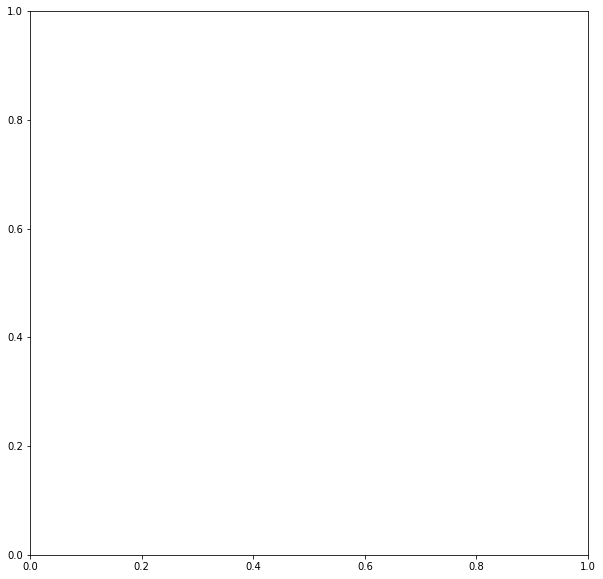

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_strategy_curve(rf_best_no_overfit,X_train,y_train, ax, label='RF train',color='green',linestyle='--')
plot_strategy_curve(rf_best_no_overfit,X_test,y_test, ax, label='RF test',color = 'green')
plot_strategy_curve(lr,X_train,y_train, ax, label='LR train',color='darkred',linestyle='--')
plot_strategy_curve(lr,X_test,y_test, ax, label='LR test',color = 'darkred')

(0, 0.45)

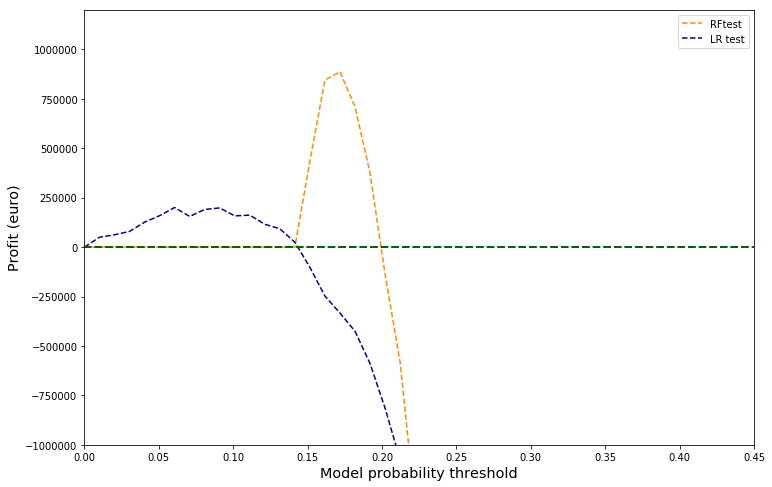

In [44]:
cost_of_bads = 10000
profit_of_goods = 1200
# cost_of_bads = 1
# profit_of_goods = 1

from plotting import plot_classifier_profit
fig, ax = plt.subplots(figsize=(12, 8))

#plot_classifier_profit(rf2,X_train,y_train, ax, cost_of_bads, profit_of_goods, label=' RF train',color='darkorange')
plot_classifier_profit(rf_best_no_overfit,X_test,y_test, ax, cost_of_bads, profit_of_goods, label='RFtest',linestyle='--', color='darkorange')
#plot_classifier_profit(lr,X_train,y_train, ax, cost_of_bads, profit_of_goods, label='LR train',color = 'darkblue')
plot_classifier_profit(lr,X_test,y_test, ax,cost_of_bads, profit_of_goods, label='LR test',color = 'darkblue',linestyle='--')

ax.set_ylim(-1e6,1.2e6)
ax.set_xlim(0,0.45)

# ax.set_ylim(0.0001,3e7)
# ax.semilogy()

### And what about the Model interpretability?
* Can we say something about which features are important?

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
pd.Series(rf_best_no_overfit.feature_importances_,index = X_train.columns).sort_values(ascending=False).plot(kind='bar')

### If there is time, a follow up exercise:
* Try to simplify your model by keeping a lower number of features
* Try improving your model by creating more features (and later select the best ones)